In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("../data/processed/2023_pace_laps_with_delta.csv")

In [3]:
FEATURES = [
    "TyreLife",
    "TyreLifeSquared",
    "LapInStint",
    "LapNumber",
    "Stint",
    "Compound_encoded",
    "Driver_encoded",
    "Team_encoded",
]


In [4]:
TARGET = "LapDelta_seconds"

In [5]:

X = df[FEATURES]
y = df[TARGET]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [8]:
y_pred = model.predict(X_test)

In [9]:
error_df = df.loc[X_test.index].copy()
error_df["Predicted_LapDelta"] = y_pred
error_df["Error"] = error_df["Predicted_LapDelta"] - error_df["LapDelta_seconds"]
error_df["AbsError"] = error_df["Error"].abs()

error_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,TyreLifeSquared,LapInStint,Compound_encoded,Driver_encoded,Team_encoded,TrackBaselineLapTime,LapDelta_seconds,Predicted_LapDelta,Error,AbsError
6132,0 days 02:14:05.104000,ZHO,24,0 days 00:01:32.645000,43.0,4.0,NaN,NaN,0 days 00:00:29.298000,0 days 00:00:37.603000,...,100.0,5,3,21,0,93.026686,-0.381686,-0.548173,-0.166486,0.166486
9084,0 days 01:36:59.795000,SAR,2,0 days 00:01:26.100000,24.0,2.0,NaN,NaN,0 days 00:00:30.559000,0 days 00:00:31.117000,...,196.0,9,0,17,9,84.640008,1.459992,0.611346,-0.848646,0.848646
7201,0 days 02:05:18.685000,ZHO,24,0 days 00:01:17.575000,45.0,3.0,NaN,NaN,0 days 00:00:21.569000,0 days 00:00:24.810000,...,169.0,11,0,21,0,77.646801,-0.071801,-0.781239,-0.709438,0.709438
1475,0 days 02:31:30.159000,PER,11,0 days 00:01:20.747000,49.0,4.0,NaN,NaN,0 days 00:00:28.285000,0 days 00:00:17.969000,...,1764.0,38,0,12,8,82.977719,-2.230719,-2.053756,0.176963,0.176963
17475,0 days 01:52:09.530000,SAR,2,0 days 00:01:34.738000,29.0,2.0,NaN,NaN,0 days 00:00:35.229000,0 days 00:00:29.702000,...,121.0,9,2,17,9,95.095832,-0.357832,0.250516,0.608347,0.608347


In [10]:
track_error = (
    error_df.groupby("RaceName")["AbsError"]
    .mean()
    .sort_values(ascending=False)
)

track_error.head(10)

RaceName
Monaco Grand Prix           3.116077
Dutch Grand Prix            1.705024
Belgian Grand Prix          1.023186
Bahrain Grand Prix          0.935559
Spanish Grand Prix          0.853806
Singapore Grand Prix        0.834306
United States Grand Prix    0.831906
São Paulo Grand Prix        0.766127
Mexico City Grand Prix      0.760897
Miami Grand Prix            0.750763
Name: AbsError, dtype: float64

In [11]:
driver_error = (
    error_df.groupby("Driver")["AbsError"]
    .mean()
    .sort_values(ascending=False)
)

driver_error.head(10)

Driver
SAR    1.696335
BOT    1.388466
ALB    1.196130
DEV    1.112932
PER    1.077516
RIC    1.024251
TSU    1.014520
HUL    0.893545
STR    0.884457
NOR    0.884182
Name: AbsError, dtype: float64

In [12]:
error_df["AbsError"].describe()


count    4332.000000
mean        0.911050
std         2.128676
min         0.000146
25%         0.183361
50%         0.428967
75%         0.907578
max        47.497655
Name: AbsError, dtype: float64

<Axes: >

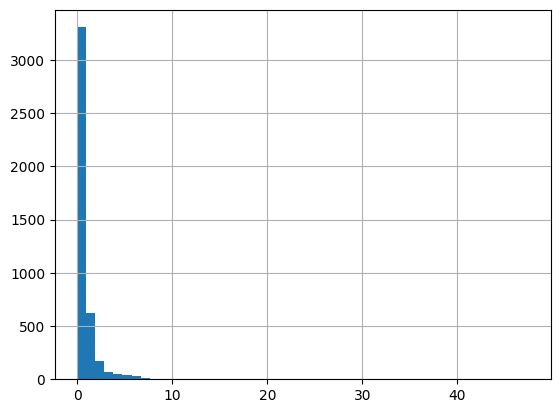

In [13]:
error_df["AbsError"].hist(bins=50)